In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# I strongly encourage you to use Markdown for the homework
### poorly formatted homeworks will lose points on hw 5, you've been warned

# Also - How do we make a long line of code into two lines?

In [6]:
print("its actually quite easy,", "instead of this stretching on forever....................................................")

its actually quite easy, instead of this stretching on forever....................................................


In [8]:
print("its actually quite easy,", 
"instead of this stretching on forever....................................................")

its actually quite easy, instead of this stretching on forever....................................................


In [11]:
this_list = ["what", "a", "great", "list"]

for word in this_list:
    print(word)

print("\n") #this creates a space
    
for word in \
    this_list:
    print(word)

what
a
great
list


what
a
great
list


In [12]:
print("hey\n", "now")

hey
 now


#  Let's make some fake data!

In [34]:
years = ['2001', '2002', '2003', '2004', '2005','2006']
temp_us = [72, 73, 74, 75, 68, 69]
temp_uk = [74, 73, 78, 79, 74, 76]
humidity_us = [67, 87, 89, 76, 34, 68]
df = pd.DataFrame({'years':years, 'temp_us':temp_us,'temp_uk':temp_uk, "humidity_us":humidity_us})

In [24]:
df

,years,temp_us,temp_uk,humidity_us
0,2001,72,74,67
1,2002,73,73,87
2,2003,74,78,89
3,2004,75,79,76
4,2005,68,74,34
5,2006,69,76,68


### Simple with Matplotlib

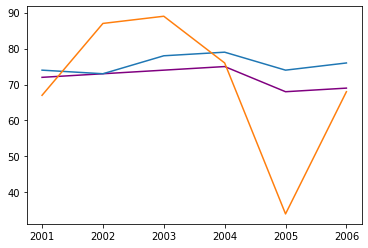

In [19]:
plt.plot(df.years,df.temp_us, color = "purple")
plt.plot(df.years,df.temp_uk)
plt.plot(df.years,df.humidity_us)

In [26]:
df.index = df.years

In [27]:
df

,years,temp_us,temp_uk,humidity_us
years,,,,
2001,2001,72,74,67
2002,2002,73,73,87
2003,2003,74,78,89
2004,2004,75,79,76
2005,2005,68,74,34
2006,2006,69,76,68


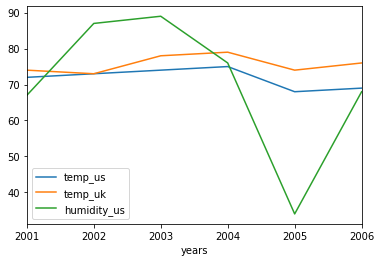

In [28]:
df.plot()

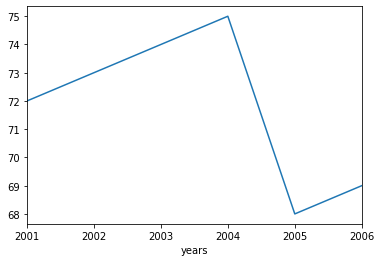

In [29]:
df.temp_us.plot()

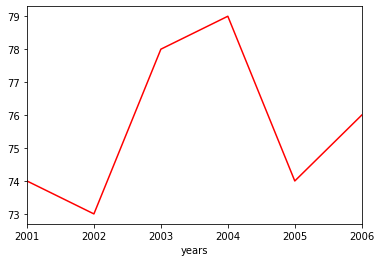

In [31]:
df.temp_uk.plot(color = "red")

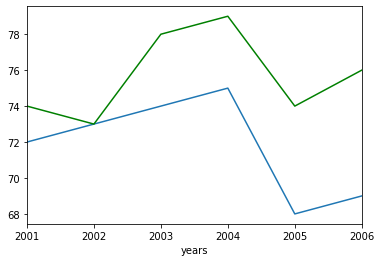

In [32]:
df.temp_us.plot()
df.temp_uk.plot(color = 'green')

# Simple Regression!

### Look for coefficient, P-values, confidence interval, $r^2$

In [35]:
df

,years,temp_us,temp_uk,humidity_us
0,2001,72,74,67
1,2002,73,73,87
2,2003,74,78,89
3,2004,75,79,76
4,2005,68,74,34
5,2006,69,76,68


In [38]:
y = df.temp_us
X = df[['temp_uk', 'humidity_us']]
Xc = sm.add_constant(X)
## fit OLS model with intercept on the variables


/Users/williamgodel/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [40]:

est = sm.OLS(y, Xc).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                temp_us   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     3.713
Date:                Tue, 19 Nov 2019   Prob (F-statistic):              0.154
Time:                        15:43:57   Log-Likelihood:                -10.379
No. Observations:                   6   AIC:                             26.76
Df Residuals:                       3   BIC:                             26.13
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          40.5077     27.786      1.458      

/Users/williamgodel/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


In [39]:
Xc

,const,temp_uk,humidity_us
0,1.0,74,67
1,1.0,73,87
2,1.0,78,89
3,1.0,79,76
4,1.0,74,34
5,1.0,76,68


### What is the Regression Equation?

### $temp\_us_{i} = \alpha + \beta1*temp\_uk_i + \beta2*humidity\_us_i + \epsilon_i $ 

In [41]:
df

,years,temp_us,temp_uk,humidity_us
0,2001,72,74,67
1,2002,73,73,87
2,2003,74,78,89
3,2004,75,79,76
4,2005,68,74,34
5,2006,69,76,68


### What are my residuals?
### Well predictions are:

In [43]:
est.predict(Xc)

0    70.983838
1    72.628865
2    74.439433
3    73.483130
4    67.736992
5    71.727743
dtype: float64

In [ ]:
df

### So residuals are:

In [44]:
residuals = est.predict(Xc) - y

In [45]:
residuals

0   -1.016162
1   -0.371135
2    0.439433
3   -1.516870
4   -0.263008
5    2.727743
dtype: float64

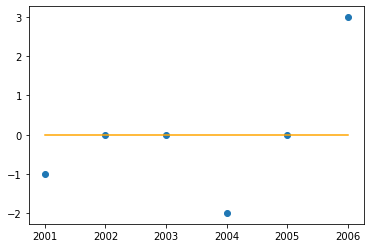

In [48]:
plt.scatter(df.years,residuals.round())
plt.plot(df.years,len(df.years)*[0], color = 'orange') #to add a line

In [49]:
len(df.years)*[0]

[0, 0, 0, 0, 0, 0]

# Final Review!
# Confidence Intervals!


### Let's simulate some data

In [50]:
population = np.random.normal(1,size = 1000)

In [51]:
population

array([-3.88414271e-01,  1.36706324e-01, -6.57805000e-01,  1.24774015e+00,
        1.89311775e+00,  1.53979959e+00,  2.08510543e+00,  1.04397278e+00,
        2.26334897e+00,  1.97379742e+00, -1.14551660e+00, -1.40970267e-02,
       -3.95619553e-03,  1.80963514e+00,  3.24422371e-01,  9.69007151e-01,
       -6.85119006e-01,  7.53485263e-01,  3.19277260e-01,  3.68868888e-03,
        1.56706944e+00, -6.27858223e-02,  1.86429479e+00,  1.30572739e+00,
        6.20331321e-01,  1.31482944e+00, -6.90670107e-01,  1.70926249e+00,
        2.68782813e+00,  1.10730762e+00,  4.81370163e-01,  1.03898648e+00,
        1.50867682e+00,  1.00380515e+00,  1.21315237e+00,  3.09406081e+00,
        7.88245046e-01, -8.46410603e-01,  1.11944406e+00,  1.23676919e+00,
        2.74167243e+00,  8.42776831e-01,  4.82669421e-01,  3.87384507e-01,
       -9.74419595e-01, -6.06730147e-01, -2.67738064e-01,  3.03716481e-01,
        2.25233559e+00, -5.11853522e-01,  4.99611542e-01,  2.09581811e+00,
        1.32354960e+00,  

(array([  2.,   2.,   4.,   8.,  16.,  16.,  30.,  33.,  65.,  55.,  90.,
         82., 103.,  94.,  83.,  77.,  79.,  45.,  36.,  26.,  24.,  14.,
          8.,   5.,   3.]),
 array([-2.0926295 , -1.85577826, -1.61892702, -1.38207578, -1.14522453,
        -0.90837329, -0.67152205, -0.43467081, -0.19781956,  0.03903168,
         0.27588292,  0.51273416,  0.74958541,  0.98643665,  1.22328789,
         1.46013913,  1.69699038,  1.93384162,  2.17069286,  2.4075441 ,
         2.64439535,  2.88124659,  3.11809783,  3.35494907,  3.59180032,
         3.82865156]),
 <a list of 25 Patch objects>)

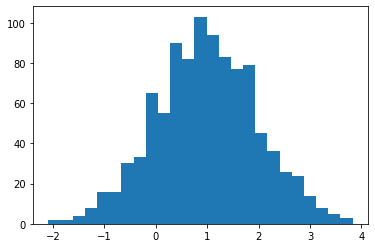

In [52]:
plt.hist(population, bins = 25)

In [53]:
np.mean(population)

0.9816196135500092

### Now let's pretend we can't see the population - only a sample

In [60]:
sample = np.random.choice(population, size = 50)

In [61]:
sample

array([-0.35151993,  0.6058701 ,  1.30341732,  1.54134922, -0.3247882 ,
        3.36126322,  0.32252106, -0.71026414,  1.00446729,  0.32442237,
        1.63773628,  1.7928564 , -0.20895392, -0.35151993,  0.77266317,
        0.71014994,  1.15291583, -0.05605403,  1.47262673,  0.55164631,
        0.3859095 , -0.15406394,  2.7146299 ,  1.80963514, -0.97050975,
        1.40178071,  1.34547803,  1.52136931,  1.71386542,  1.56053318,
        1.65341177,  2.00560497,  1.81396677, -0.05671827,  1.56706944,
        1.82913853,  0.32636625,  1.25124015, -1.03271199,  1.01946688,
        2.27712631,  1.67383753,  1.11655369,  2.53606203,  1.3347262 ,
        1.83535356,  1.81775369,  1.72064358,  1.68055084,  1.329262  ])

### We know from the law of large numbers this should converge towards the mean

In [62]:
sample_mean = np.mean(sample)
sample_mean

1.0715627303671105

### And Let's construction a confidence interval
### remember, we need the standard error, which is just
### $se = sd(X)/\sqrt(N)$

In [63]:
se = np.std(sample)/np.sqrt(50)

In [64]:
se

0.13530897102320805

### By the CLT - we know that our sample means are distributed normally
### So we construct a confidence interval around this sample that is normaly distributed
### that means +- 1.96 sd (in this case or sd is se) contains 95% of observations

In [65]:
low_ci = sample_mean - 1.96*se
high_ci = sample_mean + 1.96*se
print("Confidence Interval is: ",low_ci.round(3),high_ci.round(3))

Confidence Interval is:  0.806 1.337


### Does this contain the true mean?

### Let's do a quick bootstrap to see the sample mean distribtion

(array([  2.,   3.,   3.,   2.,   9.,  17.,  33.,  35.,  54.,  85., 102.,
        103., 109.,  96., 101.,  74.,  55.,  43.,  28.,  25.,   9.,   6.,
          3.,   2.,   1.]),
 array([0.49939002, 0.53723645, 0.57508287, 0.61292929, 0.65077572,
        0.68862214, 0.72646856, 0.76431499, 0.80216141, 0.84000783,
        0.87785426, 0.91570068, 0.95354711, 0.99139353, 1.02923995,
        1.06708638, 1.1049328 , 1.14277922, 1.18062565, 1.21847207,
        1.25631849, 1.29416492, 1.33201134, 1.36985777, 1.40770419,
        1.44555061]),
 <a list of 25 Patch objects>)

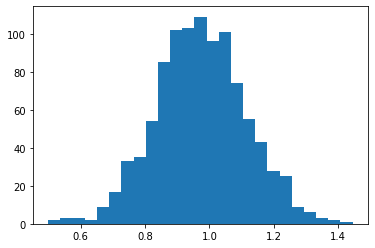

In [70]:
num_iter = 1000

means = []

for num in range(num_iter):
    this_sample = np.random.choice(population, size = 50)
    
    means.append(np.mean(this_sample))
    
    
plt.hist(means, bins = 25)


(array([  2.,   2.,   4.,   8.,  16.,  16.,  30.,  33.,  65.,  55.,  90.,
         82., 103.,  94.,  83.,  77.,  79.,  45.,  36.,  26.,  24.,  14.,
          8.,   5.,   3.]),
 array([-2.0926295 , -1.85577826, -1.61892702, -1.38207578, -1.14522453,
        -0.90837329, -0.67152205, -0.43467081, -0.19781956,  0.03903168,
         0.27588292,  0.51273416,  0.74958541,  0.98643665,  1.22328789,
         1.46013913,  1.69699038,  1.93384162,  2.17069286,  2.4075441 ,
         2.64439535,  2.88124659,  3.11809783,  3.35494907,  3.59180032,
         3.82865156]),
 <a list of 25 Patch objects>)

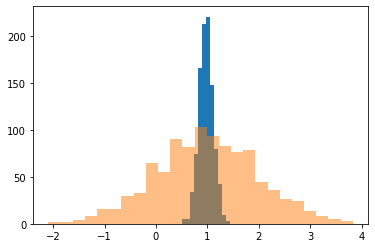

In [71]:
plt.hist(means, bins = 12)
plt.hist(population, bins = 25, alpha = .5)

### What is the standard deviation

In [72]:
np.std(means)

0.13988482445639205

### Remember, we calculated (off a small sample):

In [73]:
se

0.13530897102320805

### Not bad

### How many of the means we simulated would have captured the true mean?

In [74]:
captured = []
failed = []

for this_mean in means:
    
    low_bound = this_mean - 1.96*se
    high_bound = this_mean + 1.96*se
    
    if low_bound > 1 or high_bound < 1:
        failed.append(this_mean)
    else:
        captured.append(this_mean)
    

(array([22., 24., 29., 41., 65., 62., 76., 63., 75., 79., 68., 77., 65.,
        41., 41., 32., 29., 18., 22., 13.]),
 array([0.73483057, 0.76134505, 0.78785954, 0.81437402, 0.8408885 ,
        0.86740299, 0.89391747, 0.92043196, 0.94694644, 0.97346093,
        0.99997541, 1.0264899 , 1.05300438, 1.07951887, 1.10603335,
        1.13254784, 1.15906232, 1.1855768 , 1.21209129, 1.23860577,
        1.26512026]),
 <a list of 20 Patch objects>)

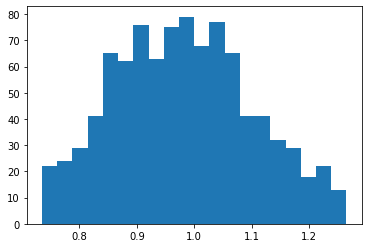

In [75]:
plt.hist(captured, bins = 20)

(array([ 3.,  3.,  3., 10., 23.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  7.,  5.,  3.,  1.]),
 array([0.49939002, 0.54669805, 0.59400608, 0.64131411, 0.68862214,
        0.73593017, 0.7832382 , 0.83054623, 0.87785426, 0.92516229,
        0.97247032, 1.01977835, 1.06708638, 1.11439441, 1.16170244,
        1.20901046, 1.25631849, 1.30362652, 1.35093455, 1.39824258,
        1.44555061]),
 <a list of 20 Patch objects>)

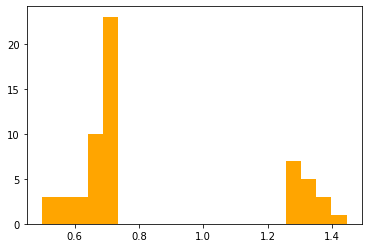

In [76]:
plt.hist(failed, bins = 20, color = 'orange')

(array([ 3.,  3.,  3., 10., 23.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  7.,  5.,  3.,  1.]),
 array([0.49939002, 0.54669805, 0.59400608, 0.64131411, 0.68862214,
        0.73593017, 0.7832382 , 0.83054623, 0.87785426, 0.92516229,
        0.97247032, 1.01977835, 1.06708638, 1.11439441, 1.16170244,
        1.20901046, 1.25631849, 1.30362652, 1.35093455, 1.39824258,
        1.44555061]),
 <a list of 20 Patch objects>)

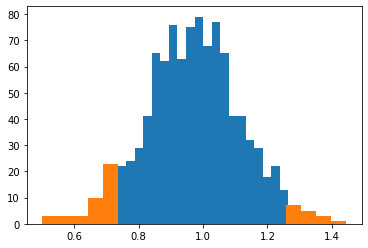

In [77]:
plt.hist(captured, bins = 20)
plt.hist(failed, bins = 20)

### How many captured the true mean?

In [78]:
len(captured)*100/1000 #captured the true mean

94.2

In [79]:
len(failed)*100/1000 #failed to capture it

5.8

### How does this relate to hypothesis testing?

### We know that 95% of our confidence intervals DO contain the true mean

### So if we have a null - and that null is NOT in our confidence interval

### then we can reject it - we know that only 5% of the time will we in fact not have the true mean in our confidence interval

### Therefore if the null is NOT in our confidence interval, we reject it. 

### Even if the null is in fact true - we will only end up rejecting it 5% of the time (type I error). 

### In this case, if our null was that the mean is 1, we would reject it only around 5% of time - and these would be type one errors

# What to take for Data Science?

## Datascience is not a unified field. It is a combination of CS, Math, and Statistics, with a significant amount of outside theory and intuition. There is no one way to make or be a datascientist - its a diverse skills set.

## That said, there are certain key skills. These are necessary for a deep understanding what you are doing and why, and are worth pursing if you want to be a datascientist or work primarily with data. 

## Finally, classes are scarce/expensive. Figure out what you want to learn and pursue that. Don't waste classes.

# MATH/Stats - critical
### - Calculus 1-3 (up to multivariate calculus)
### - Probability Theory
### - Linear Algebra (two semesters)
### - Real Analysis (optional)
### - Mathematical Statistics
### - Econometrics (optional but key for social science)

# CS/Programming
### - Python ! 
### - R (also useful)
### - Fundamental Algorithms (optional)
### - Big data/Databases (optional)
 
# Datascience Classes
### - Machine Learning  
### - Deep Learning (optional)
### - Natural Languate Processessing (optional)
### - Causal Inference 


